# Life Expectancy vs GDP Analysis Project

### By: Iyinoluwa 'Yinnie' Akenroye 

#### October 2024

## Project Background: 

This project is to analyze the Life Expectancy GDP data to derive insights from the dataset and identify the relationship between the GDP and life expectancy of the six countries presented.

Additionally, different visualization techniques will be employed to display the correlation between the dependent and independent variables in the dataset.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

This data had been prior cleaned by the World Health Organization and the World Bank.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Methodology:

Firstly, a descriptive analysis will be done to describe major patterns in the data through summary statistics and visualization of the measures of central tendency and spread, 
e.g the mean, median, range, IQR and Std deviation.

Secondly, an exploratory analysis will be done to explore the correlation and relationship between the different quantitative and qualitative  variables of the dataset. 

### Descriptive and Explorative Data Analysis

#### i.) Summary Statistics: the mode, mean, median, range, IQR and Std deviation of the numeric variables

- mode of the year
- mean and median of life expectancy at birth, and GDP of the dataset
- range of year, life expectancy at birth, and GDP
- mean / median life expectancy grouped by country across the entire dataset
- mean / median life expectancy over the years across the entire dataset
- mean / median life expectancy over the years grouped by country
- mean / median GDP grouped by country across the entire dataset
- mean / median GDP over the years across the entire dataset
- mean / median GDP over the years grouped by country

#### ii.) Exploratory Analysis:  relationship between dependent and independent variables

**Relationships to explore:**
- GDP and Life Expectancy
- Year and GDP
- Year and Life Expectancy
- Country and GDP
- Country and Life Expectancy

**Relationships to plot:**
- Histograms of GDP; Life Expectancy
- Bar chart showing Countries and median GDP; Countries and Median Life Expectancy
- Violin Plot of Countries and GDP; Countries and Life Expectancy
- Swarm Plot of Countries and GDP; Countries and Life Expectancy
- Line Plot of GDP over the Years; Life Expectancy over the Years 
- Facet Grid Plot of GDP over the Years; Life Expectancy over the Years; GDP and Life Expectancy
- Box Plot of Countries and GDP; Countries and Life Expectancy
- Scatterplot of Year and GDP; Year and Life Expectancy; GDP and Life Expectancy


## Results and Observations:

In [2]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lifegdp_df = pd.read_csv('all_data.csv')

In [4]:
print(lifegdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [5]:
print(lifegdp_df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [6]:
print(lifegdp_df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [7]:
print(lifegdp_df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


In [8]:
#Defining a class with methods for the analysis

class LifexpectancyGDP:
    def __init__(self, data=lifegdp_df):
        self.data = data
        
    def calc_mode(self, col):
        mode_values = self.data[col].mode()
        return mode_values
    
    def calc_mean(self, col):
        mean = np.mean(self.data[col])
        return round(mean, 2)
    
    def calc_median(self, col):
        median = np.median(self.data[col])
        return round(median, 2)
    
    def calc_range(self, col):
        max_val = self.data[col].max()
        min_val = self.data[col].min()
        range_val = max_val - min_val
        return range_val
    
    def calc_iqr(self, col):
        q3 = self.data[col].quantile(0.75)
        q1 = self.data[col].quantile(0.25)
        iqr = q3 - q1
        return iqr
    
    def calc_std(self, col):
        std_val = self.data[col].std()
        return std_val
    
    def find_outliers(self, col):
        q1 = self.data[col].quantile(0.25)
        q3 = self.data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outliers = self.data[(self.data[col] < lower_bound) | (self.data[col] > upper_bound)][col]
        return outliers
    
    def calc_mean_by_group(self, col, *group_by_col):
        mean_by_grp = self.data.groupby(list(group_by_col))[col].mean().reset_index().round(2)
        return mean_by_grp
    
    def calc_median_by_group(self, col, *group_by_col):
        median_by_grp = self.data.groupby(list(group_by_col))[col].median().reset_index().round(2)
        return median_by_grp
    
    def draw_boxplot(self, x_axis, y_axis):
        ax = plt.subplot()
        sns.boxplot(data=self.data, x=x_axis, y=y_axis)
        plt.xticks(rotation=45)
        ax.set_xticks([0,1,2,3,4,5])
        ax.set_xticklabels(['Chile', 'China', 'Germany','Mexico', 'U.S.A', 'Zimbabwe'])
        plt.show()
        plt.close()
    
    def draw_line_scatterplot(self, x_axis, y_axis):
        sns.lmplot(x= x_axis, y=y_axis, hue='Country', data=self.data)
        plt.show()

### -  Summary Statistics for Numeric Variables

In [9]:
lifexpect_dataset = LifexpectancyGDP()
# print(lifexpect_dataset.data.head())

lifexpect_dataset.data.rename(columns={'Life expectancy at birth (years)':'Expectancy'}, inplace=True)
print(lifexpect_dataset.data.head())

  Country  Year  Expectancy           GDP
0   Chile  2000        77.3  7.786093e+10
1   Chile  2001        77.3  7.097992e+10
2   Chile  2002        77.8  6.973681e+10
3   Chile  2003        77.9  7.564346e+10
4   Chile  2004        78.0  9.921039e+10


##### Calculating the mode of Year

In [10]:
mode_year = lifexpect_dataset.calc_mode('Year')
print(lifexpect_dataset.data.groupby('Year').count().reset_index())

    Year  Country  Expectancy  GDP
0   2000        6           6    6
1   2001        6           6    6
2   2002        6           6    6
3   2003        6           6    6
4   2004        6           6    6
5   2005        6           6    6
6   2006        6           6    6
7   2007        6           6    6
8   2008        6           6    6
9   2009        6           6    6
10  2010        6           6    6
11  2011        6           6    6
12  2012        6           6    6
13  2013        6           6    6
14  2014        6           6    6
15  2015        6           6    6


#### Insights Derived: 
- All the years have the same number of data entries which no year being higher than the other.

##### Calculating the mean and median of Life Expectancy and GDP

In [11]:
mean_life_exp = lifexpect_dataset.calc_mean('Expectancy')
median_life_exp = lifexpect_dataset.calc_median('Expectancy')
print(f"Life Expectancy - the mean value is: {mean_life_exp:,.2f}yrs ; the median value is {median_life_exp:,.2f}yrs")

mean_gdp = lifexpect_dataset.calc_mean('GDP')
median_gdp = lifexpect_dataset.calc_median('GDP')
print(f"GDP - the mean value is: {mean_gdp:,.2f}yrs ; the median value is {median_gdp:,.2f}yrs")


Life Expectancy - the mean value is: 72.79yrs ; the median value is 76.75yrs
GDP - the mean value is: 3,880,498,570,768.40yrs ; the median value is 1,280,220,000,000.00yrs


#### Insights Derived: 
- From the analysis above the Lige Expectancy and GDP variables show a variation between its mean and median values.

- GDP has a mean value that is twice that of its median value. This indicates a right-skewed distribution because there are larger outlier values that pull the mean to the right. 

- Life Expectancy has a mean value that is less than its median value. This indicates a left-skewed distribution because there are lesser outlier values that pull the mean to the left.

##### Calculating the range, IQR and Std Dev. of Life Expectancy and GDP

In [12]:
range_life_exp = lifexpect_dataset.calc_range('Expectancy')
iqr_life_exp = lifexpect_dataset.calc_iqr('Expectancy')
std_life_exp = lifexpect_dataset.calc_std('Expectancy')

print(f"Life Expectancy - the range value is: {range_life_exp:,.2f}yrs; the IQR value is {iqr_life_exp:,.2f}yrs; the Std. Dev. is {std_life_exp:,.2f}yrs")

range_gdp = lifexpect_dataset.calc_range('GDP')
iqr_gdp = lifexpect_dataset.calc_iqr('GDP')
std_gdp = lifexpect_dataset.calc_std('GDP')

print(f"GDP - the range value is: {range_gdp:,.2f}; the IQR value is {iqr_gdp:,.2f}; the Std. Dev. is {std_gdp:,.2f}")



Life Expectancy - the range value is: 36.70yrs; the IQR value is 4.43yrs; the Std. Dev. is 10.67yrs
GDP - the range value is: 18,095,584,297,200.00; the IQR value is 3,894,208,250,000.00; the Std. Dev. is 5,197,561,310,975.92


#### Insights Derived: 
- From the analysis above:
    - **Life Expectancy**: The *range* is quite large, indicating a significant difference between the smallest and largest values in the dataset. The lower mean value suggests that there might be lesser outlier values. An *IQR* is much lesser than the range and suggests that the central portion of the data is relatively tightly clustered compared to the overall range. This indicates that while there are extreme values, the bulk of the data is more consistent. The *standard deviation* is much smaller than the mean, suggesting that the data points are spread out around the mean, but not excessively so. It indicates moderate variability in the dataset.
    - **GDP**: The *range* is very large, indicating a very significant difference between the smallest and largest values in the dataset. The larger mean value suggests that there might be some larger outlier values. An *IQR* is much lesser than the range and suggests that the central portion of the data is relatively tightly clustered compared to the overall range. This indicates that while there are extreme values, the bulk of the data is more consistent. The *standard deviation* is much larger than the mean, suggesting that the overall dataset is more spread out due to a few extreme values. This indicates a high variability in the dataset.

##### Finding the outliers in the GDP and Life Expectancy variables

In [13]:
print(lifexpect_dataset.find_outliers('GDP'))

30    1.048240e+13
31    1.106470e+13
64    1.030000e+13
65    1.060000e+13
66    1.100000e+13
67    1.150000e+13
68    1.230000e+13
69    1.310000e+13
70    1.390000e+13
71    1.450000e+13
72    1.470000e+13
73    1.440000e+13
74    1.500000e+13
75    1.550000e+13
76    1.620000e+13
77    1.670000e+13
78    1.740000e+13
79    1.810000e+13
Name: GDP, dtype: float64


In [14]:
print(lifexpect_dataset.find_outliers('Expectancy'))

80    46.0
81    45.3
82    44.8
83    44.5
84    44.3
85    44.6
86    45.4
87    46.6
88    48.2
89    50.0
90    52.4
91    54.9
92    56.6
93    58.0
94    59.2
95    60.7
Name: Expectancy, dtype: float64


- The Life Expectancy dataset has are a lot of large outlier values.

- The GDP dataset has a lot of smaller outlier values.

- Further analysis will be done to gain insights on the contributing factors of the outliers.

##### Calculating the mean / median life expectancy grouped by country across the entire dataset

In [15]:
avg_life_by_country = lifexpect_dataset.calc_mean_by_group('Expectancy', 'Country')
print()

med_life_by_country = lifexpect_dataset.calc_median_by_group('Expectancy', 'Country')

avg_med_life_by_country = avg_life_by_country.merge(med_life_by_country, on='Country')
avg_med_life_by_country.rename(columns={'Expectancy_x':'Average Life (yrs)', 'Expectancy_y':'Median Life (yrs)'}, inplace=True)
print(avg_med_life_by_country)


                    Country  Average Life (yrs)  Median Life (yrs)
0                     Chile               78.94              79.00
1                     China               74.26              74.45
2                   Germany               79.66              79.85
3                    Mexico               75.72              75.65
4  United States of America               78.06              78.15
5                  Zimbabwe               50.09              47.40


#### Insights Derived: 
- The median value is more representative of the dataset due to the presence of outliers.
- Germany has the highest life expectancy while Zimbabwe has the least life expectancy.
- Germany has approximately 68% higher life expectancy than Zimbabwe does.

##### Calculating the mean / median life expectancy over the years across the entire dataset.

In [16]:
mean_life_by_year = lifexpect_dataset.calc_mean_by_group('Expectancy', 'Year')

median_life_by_year = lifexpect_dataset.calc_median_by_group('Expectancy', 'Year')

mean_median_life_by_year = mean_life_by_year.merge(median_life_by_year, on='Year')
mean_median_life_by_year.rename(columns={'Expectancy_x':'Average Expect.(yrs)', 'Expectancy_y':'Median Expect.(yrs)'}, inplace=True)
print(mean_median_life_by_year)

    Year  Average Expect.(yrs)  Median Expect.(yrs)
0   2000                 70.77                75.80
1   2001                 70.83                75.95
2   2002                 70.95                76.00
3   2003                 71.03                76.10
4   2004                 71.30                76.45
5   2005                 71.48                76.40
6   2006                 71.95                76.80
7   2007                 72.30                77.05
8   2008                 72.67                76.90
9   2009                 73.07                77.10
10  2010                 73.48                77.15
11  2011                 74.20                77.40
12  2012                 74.60                77.55
13  2013                 74.97                77.75
14  2014                 75.32                77.85
15  2015                 75.72                78.00


#### Insights Derived: 
- The Life Expectancy increases steadily over the years from 2000 to 2015.

##### Calculating the mean / median life expectancy over the years grouped by country.

In [17]:
median_life_by_year_country = lifexpect_dataset.calc_median_by_group('Expectancy', 'Year', 'Country')

pvt_median_life_by_year_country = median_life_by_year_country.pivot(columns='Year', index='Country', values='Expectancy')
print(pvt_median_life_by_year_country)

# Best represented on a line plot

Year                      2000  2001  2002  2003  2004  2005  2006  2007  \
Country                                                                    
Chile                     77.3  77.3  77.8  77.9  78.0  78.4  78.9  78.9   
China                     71.7  72.2  72.7  73.1  73.5  73.9  74.2  74.4   
Germany                   78.0  78.3  78.4  78.5  79.1  79.2  79.6  79.8   
Mexico                    74.8  75.0  75.0  75.0  75.4  75.3  75.8  76.0   
United States of America  76.8  76.9  77.0  77.2  77.5  77.5  77.8  78.1   
Zimbabwe                  46.0  45.3  44.8  44.5  44.3  44.6  45.4  46.6   

Year                      2008  2009  2010  2011  2012  2013  2014  2015  
Country                                                                   
Chile                     79.6  79.3  79.1  79.8  79.9  80.1  80.3  80.5  
China                     74.5  74.9  75.0  75.2  75.4  75.6  75.8  76.1  
Germany                   79.9  80.0  80.1  80.5  80.6  80.6  80.9  81.0  
Mexico          

#### Insights Derived: 
- From the table presented, Zimbabwe indicates the highest rate of increase in Life Expectancy over the years followed by China.
- While Mexico shows the least rate of increase in Life expectancy over 15 years.

##### Calculating the mean / median GDP grouped by country across the dataset.

In [18]:
avg_gdp_by_country = lifexpect_dataset.calc_mean_by_group('GDP', 'Country')
avg_gdp_by_country['GDP'] = avg_gdp_by_country['GDP'].apply(lambda x: f"{x:,.2f}")

med_gdp_by_country = lifexpect_dataset.calc_median_by_group('GDP', 'Country')
med_gdp_by_country['GDP'] = med_gdp_by_country['GDP'].apply(lambda x: f"{x:,.2f}")

avg_med_gdp_by_country = avg_gdp_by_country.merge(med_gdp_by_country, on='Country')
avg_med_gdp_by_country.rename(columns={'GDP_x':'Average GDP($)', 'GDP_y':'Median GDP($)'}, inplace=True)
print(avg_med_gdp_by_country)

                    Country         Average GDP($)          Median GDP($)
0                     Chile     169,788,845,015.31     172,997,500,000.00
1                     China   4,957,713,750,000.00   4,075,195,000,000.00
2                   Germany   3,094,775,625,000.00   3,396,350,000,000.00
3                    Mexico     976,650,625,000.00   1,004,375,500,000.00
4  United States of America  14,075,000,000,000.00  14,450,000,000,000.00
5                  Zimbabwe       9,062,579,595.06       6,733,671,150.00


#### Insights Derived: 
- The median value is more representative of the dataset due to the presence of outliers.
- The U.S.A has the highest GDP while Zimbabwe has the least GDP.
- The U.S.A has approximately 10,000 times GDP as Zimbabwe.

##### Calculating the mean / median GDP over the years across the entire dataset.

In [19]:
mean_gdp_by_year = lifexpect_dataset.calc_mean_by_group('GDP', 'Year')

median_gdp_by_year = lifexpect_dataset.calc_median_by_group('GDP', 'Year')

mean_median_gdp_by_year = mean_gdp_by_year.merge(median_gdp_by_year, on='Year')
mean_median_gdp_by_year.rename(columns={'GDP_x':'Average GDP($)', 'GDP_y':'Median GDP($)'}, inplace=True)
print(mean_median_gdp_by_year)

    Year  Average GDP($)  Median GDP($)
0   2000    2.371583e+12   9.474990e+11
1   2001    2.448752e+12   1.032052e+12
2   2002    2.561221e+12   1.106055e+12
3   2003    2.743446e+12   1.186787e+12
4   2004    2.991647e+12   1.362809e+12
5   2005    3.207074e+12   1.576158e+12
6   2006    3.463349e+12   1.858706e+12
7   2007    3.785750e+12   2.241710e+12
8   2008    4.055986e+12   2.426825e+12
9   2009    4.000653e+12   2.156480e+12
10  2010    4.299587e+12   2.234110e+12
11  2011    4.710965e+12   2.464445e+12
12  2012    4.962082e+12   2.365290e+12
13  2013    5.269258e+12   2.507245e+12
14  2014    5.558059e+12   2.594535e+12
15  2015    5.658565e+12   2.263935e+12


#### Insights Derived: 
- The GDP increases steadily over the years from 2000 to 2015.

##### Calculating the mean / median GDP over the years grouped by country.

In [20]:
median_gdp_by_year_country = lifexpect_dataset.calc_median_by_group('GDP', 'Year', 'Country')

pvt_median_gdp_by_year_country = median_gdp_by_year_country.pivot(columns='Year', index='Country', values='GDP')

# print(pvt_median_gdp_by_year_country)

#Best represented on a line plot

#### Insights Derived: 
- From the table presented, Zimbabwe indicates the highest rate of increase in Life Expectancy over the years followed by China.
- While Mexico shows the least rate of increase in Life expectancy over 15 years.

#### ii.) Exploratory Analysis: Relationship between dependent and independent variables

##### Histogram plot of GDP

Text(0.5, 0, 'GDP in Trillion of U.S. Dollars')

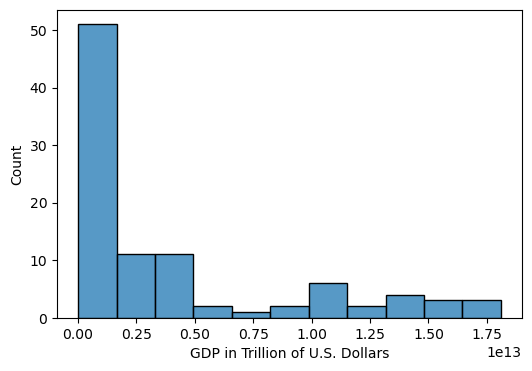

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(lifexpect_dataset.data.GDP, kde=False)
plt.xlabel("GDP in Trillion of U.S. Dollars")

#### Insights Derived: 
- The GDP distribution is right-skewed with the presence of large outlier values.

##### Histogram plot of  Life Expectancy

Text(0.5, 0, 'Life expectancy at birth (years)')

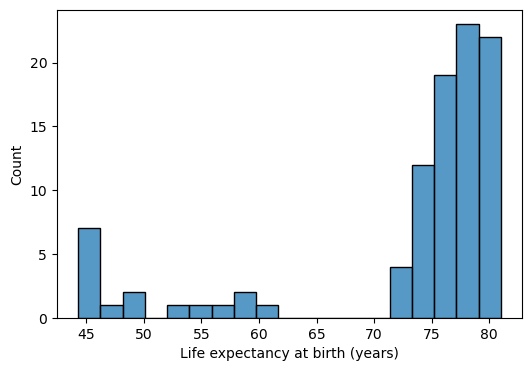

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(lifexpect_dataset.data.Expectancy, kde=False)
plt.xlabel("Life expectancy at birth (years)")

#### Insights Derived: 
- The Life Expectancy distribution is left-skewed with the presence of small outlier values.

##### Bar Chart of Countries and Median Life Expectancy

In [27]:
filtered_data = lifexpect_dataset.data.drop("Year", axis=1).groupby("Country").median().reset_index()
print(filtered_data)

                    Country  Expectancy           GDP
0                     Chile       79.00  1.729975e+11
1                     China       74.45  4.075195e+12
2                   Germany       79.85  3.396350e+12
3                    Mexico       75.65  1.004376e+12
4  United States of America       78.15  1.445000e+13
5                  Zimbabwe       47.40  6.733671e+09


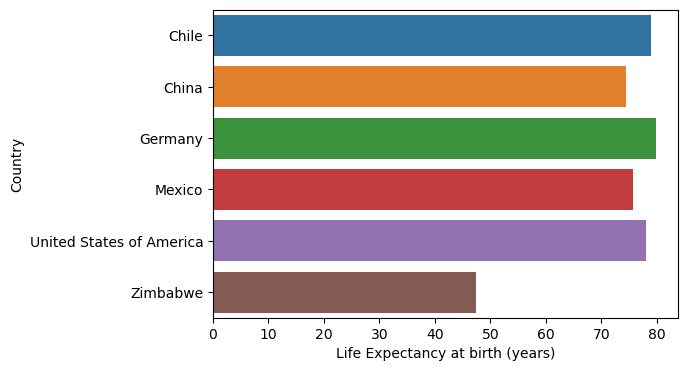

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x="Expectancy", y="Country", data=filtered_data)
plt.xlabel("Life Expectancy at birth (years)")
plt.show()

##### Bar Chart of Countries and Median GDP

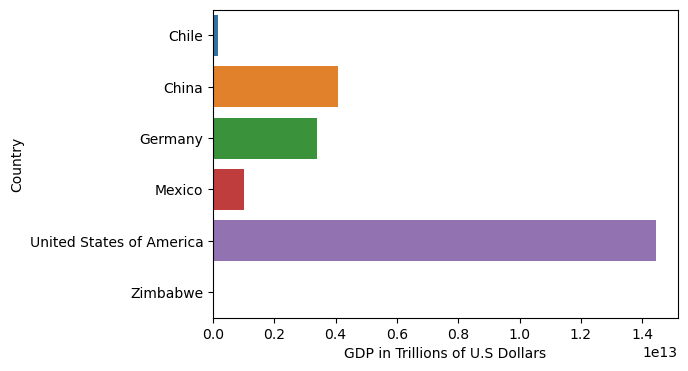

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x="GDP", y="Country", data=filtered_data)
plt.xlabel("GDP in Trillions of U.S Dollars")
plt.show()

##### Violin Plot of Countries, GDP and Life Expectancy

Text(0.5, 0, 'Life expectancy at birth (years)')

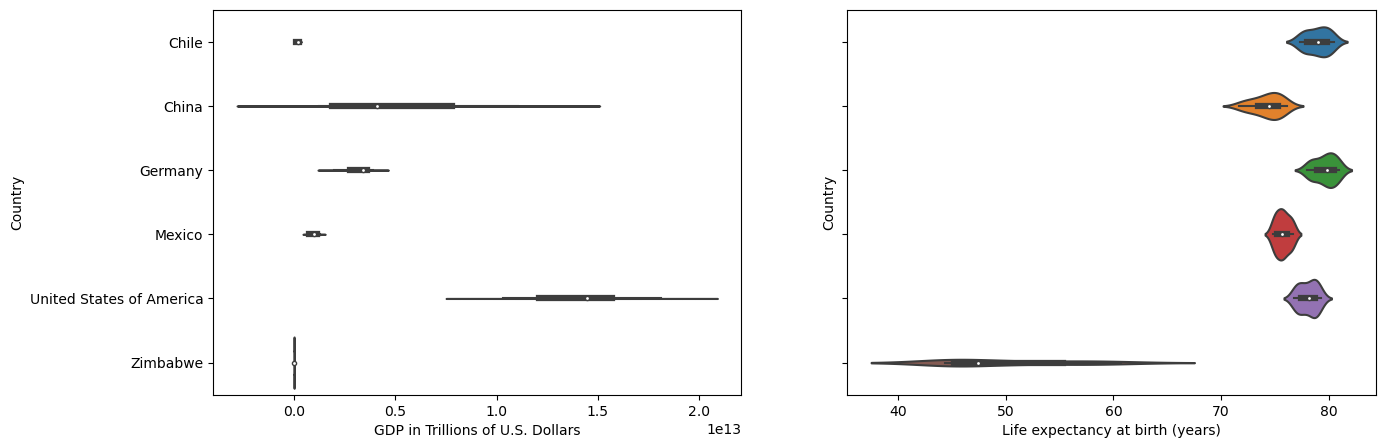

In [36]:
fig, axes = plt.subplots(1, 2,sharey=True, figsize=(15,5))
sns.violinplot(ax=axes[0], x=lifexpect_dataset.data.GDP, y=lifexpect_dataset.data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
sns.violinplot(ax=axes[1], x=lifexpect_dataset.data.Expectancy, y=lifexpect_dataset.data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)")

##### Swarm Plot of Countries, GDP and Life Expectancy
- They show dot density around the values as well as distribution through area/shape.

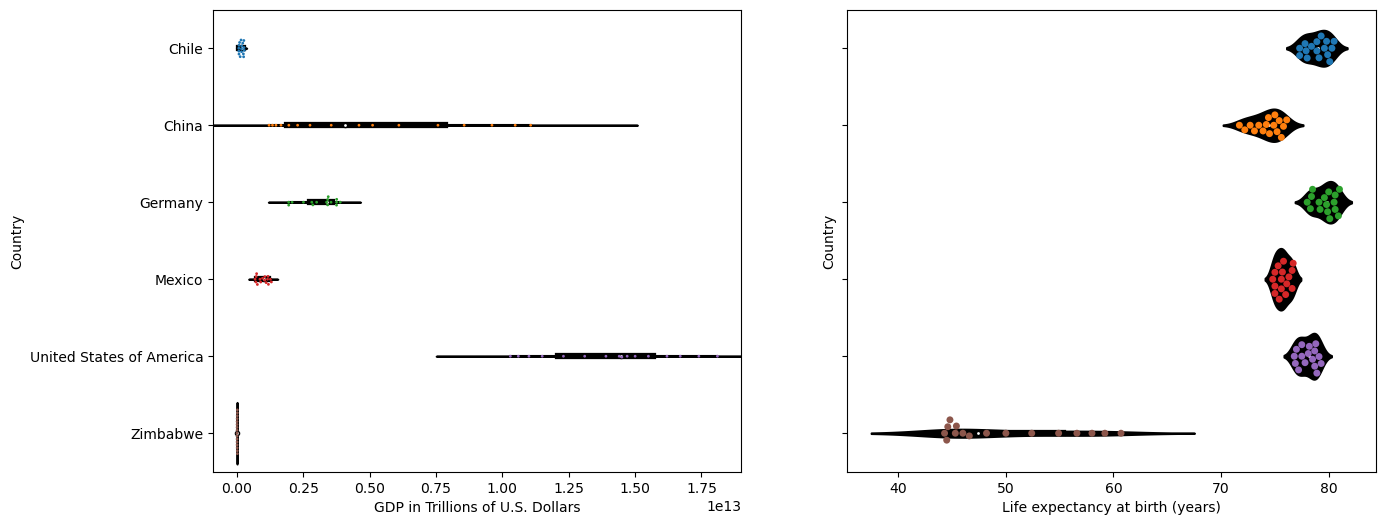

In [72]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
sns.violinplot(ax=axes[0], x=lifexpect_dataset.data.GDP, y=lifexpect_dataset.data.Country, color="black")
sns.swarmplot(ax=axes[0], x=lifexpect_dataset.data.GDP, y=lifexpect_dataset.data.Country, size=2, hue=lifexpect_dataset.data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0].legend([], [], frameon=False)

sns.violinplot(ax=axes[1], x=lifexpect_dataset.data.Expectancy, y=lifexpect_dataset.data.Country, color="black")
sns.swarmplot(ax=axes[1], x=lifexpect_dataset.data.Expectancy, y=lifexpect_dataset.data.Country, size=5, hue=lifexpect_dataset.data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)")
axes[1].legend([], [], frameon=False)
plt.show()

#### Insights Derived: 
- In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. The concentration of points indicates the density of data in certain areas.

##### Exploring the relationship between Year and GDP

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

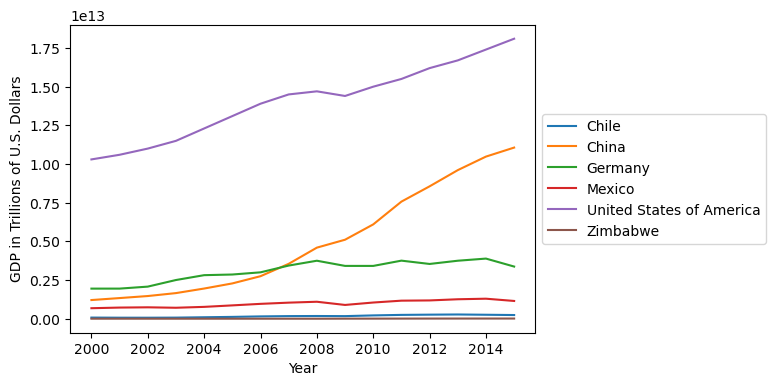

In [69]:
plt.figure(figsize=(6,4))
sns.lineplot(x=lifexpect_dataset.data.Year, y=lifexpect_dataset.data.GDP, hue=lifexpect_dataset.data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


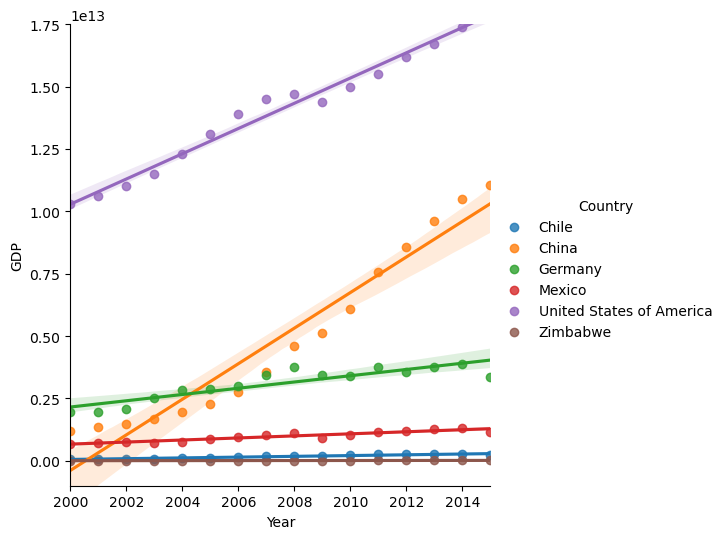

In [25]:
sns.lmplot(x='Year', y='GDP', hue='Country', data=lifexpect_dataset.data, height=5.5, aspect=1)

plt.axis([2000,2015,-0.1e13,1.75e13])

plt.show()

#### Insights Derived: 
- There is an association between the GDP and Year variables.
- The GDP increases steadily over the years with China and the U.S.A having the highest magnitute in increase and Zimbabwe having the lowest.

#### Facet Grid Plot of the GDP across the years for each Country

C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


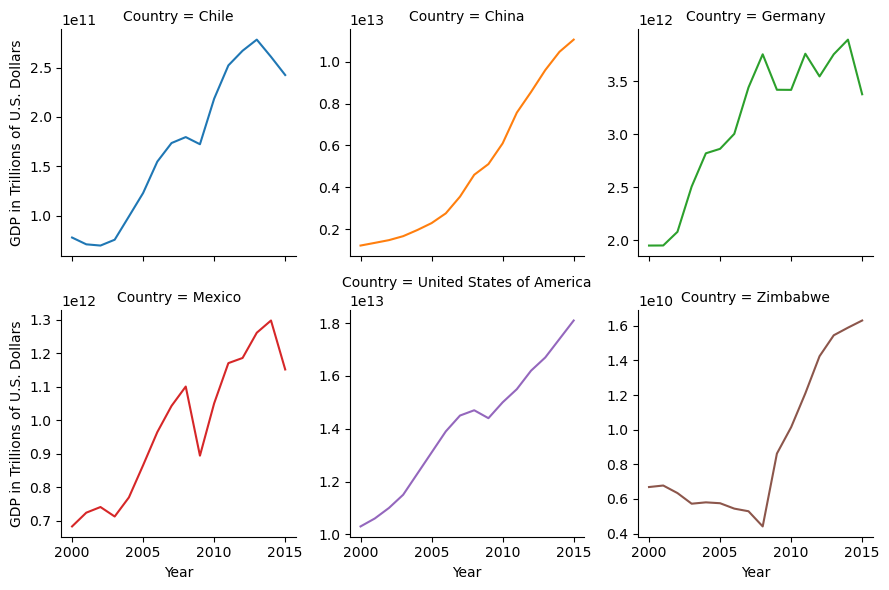

In [88]:
plot = sns.FacetGrid(lifexpect_dataset.data, col="Country", col_wrap=3, hue="Country", sharey=False)
plot.map(sns.lineplot, "Year", "GDP")
plot.set_ylabels("GDP in Trillions of U.S. Dollars")

#### Insights Derived: 
- All countries show an averall increase in GDP over the years, with Mexico showing more variability in growth than others.

##### Exploring the relationship between Year and Life Expectancy

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

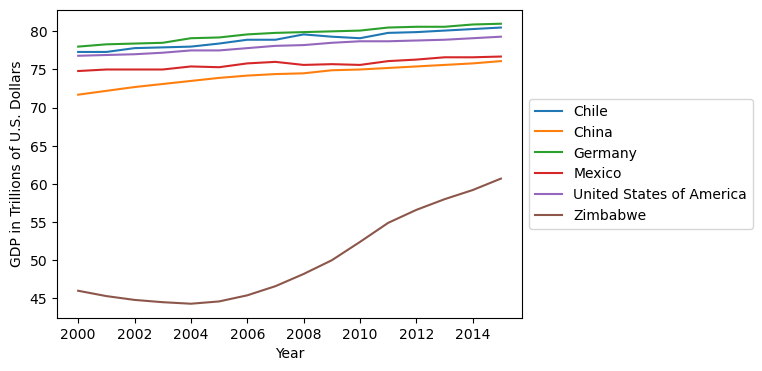

In [84]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Year', y='Expectancy', hue='Country', data=lifexpect_dataset.data)
plt.legend(ncol=1, bbox_to_anchor=(1, 0.5), loc='center left')
plt.ylabel("GDP in Trillions of U.S. Dollars")


C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


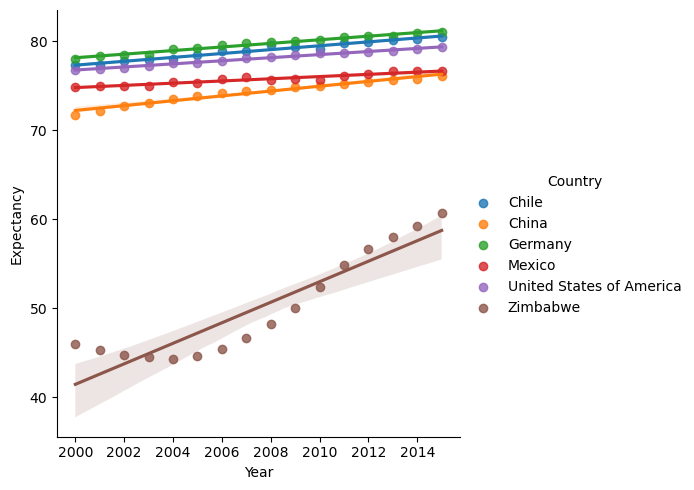

In [172]:
sns.lmplot(x='Year', y='Expectancy', hue='Country', data=lifexpect_dataset.data)
plt.axis([2000,2015,-0.1e13,1.75e13])
plt.show()

#### Insights Derived: 
- There is an association between the Life Expectancy and Year values.
- The Life Expectancy increases steadily over the years with Zimbabwe having the highest magnitute in increase and Mexico having the lowest.

#### Facet Grid Plot of the Life Expectancy across the years for each Country

C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


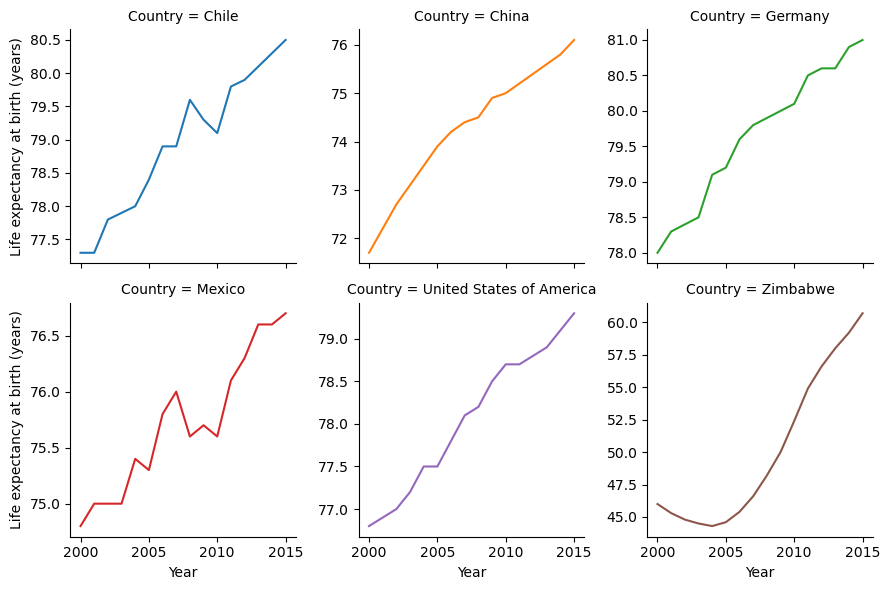

In [89]:
plot = sns.FacetGrid(lifexpect_dataset.data, col="Country", col_wrap=3, hue="Country", sharey=False)
plot.map(sns.lineplot, "Year", "Expectancy")
plot.set_ylabels("Life expectancy at birth (years)")

#### Insights Derived: 
- All countries experienced an overall increase in their Life Expectancy over the years.
- With Mexico displaying the most variations in growth and Zimbabwe having the highest magnitude of increase.

##### Exploring the relationship between Life Expectancy and GDP

C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


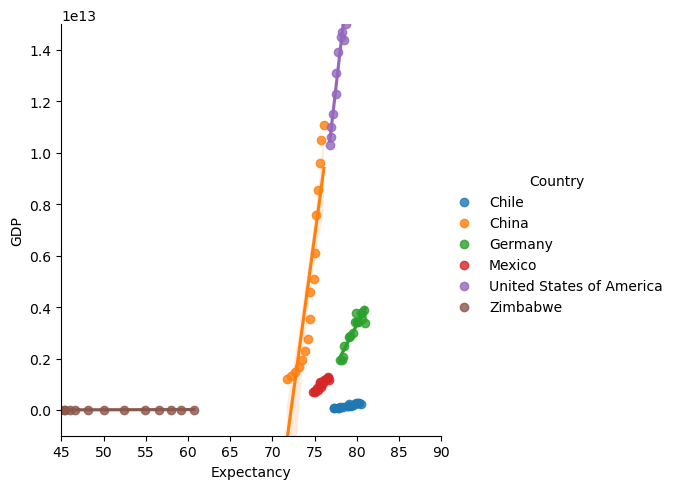

In [168]:
sns.lmplot(x='Expectancy', y='GDP', hue='Country', data=lifexpect_dataset.data)
# sns.scatterplot(x='Expectancy', y='GDP', hue='Country', data=lifexpect_dataset.data, size=8)
plt.axis([45,90,-0.1e13,1.5e13])
plt.show()

#### Insights Derived: 
- An increase in GDP is accompanied with an increase in Life Expectancy, across all countries.
- There is a positive correlation between GDP and Life Expectancy
- The greatest magnitude of increase in GDP is observed significantly in China, and is least observed in Zimbabwe.
- While the greatest magnitude of increase in Life Expectancy is observed in Zimbabwe and least observed in the U.S.A.

#### Facet Grid Plot of the Life Expectancy and GDP for each Country

C:\Users\Yinnie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


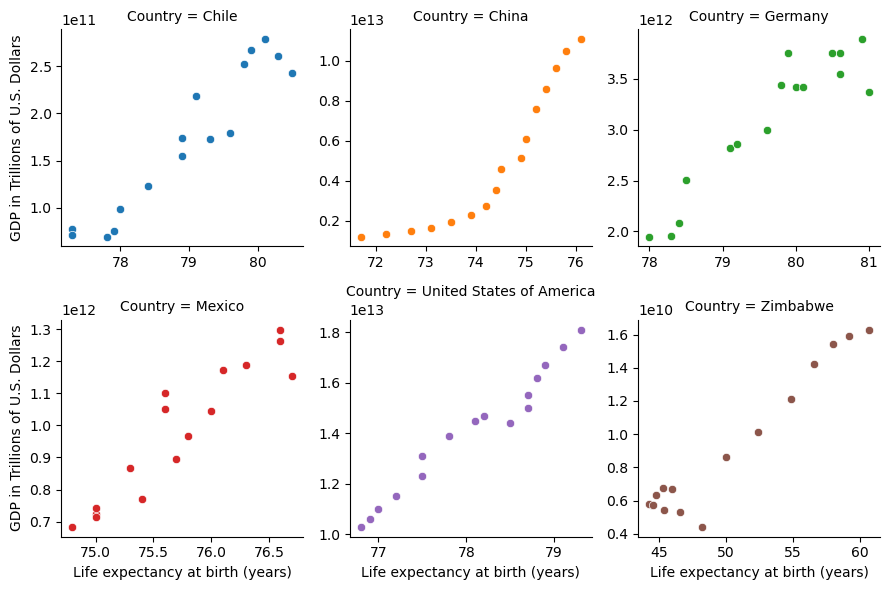

In [96]:
plot = sns.FacetGrid(lifexpect_dataset.data, col='Country', col_wrap=3, hue='Country', sharey=False, sharex=False)
plot.map(sns.scatterplot, 'Expectancy', 'GDP')
plot.set_xlabels("Life expectancy at birth (years)")
plot.set_ylabels("GDP in Trillions of U.S. Dollars")

#### Insights Derived: 
- All countries displayed a positive correlation between their GDP and Life Expectancy.
- An increase in GDP is accompanied with an increase in Life Expectancy for all countries.

##### Exploring the relationship between Country and GDP

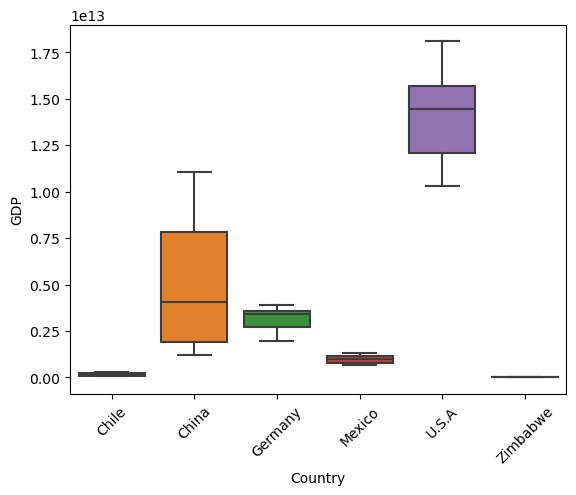

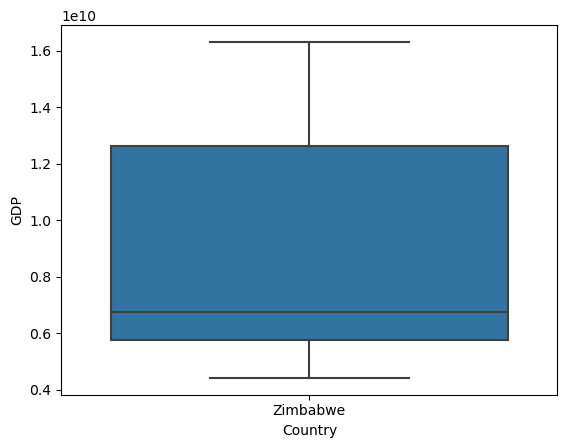

In [209]:
lifexpect_dataset.draw_boxplot('Country', 'GDP')

zimbabwe_data = lifexpect_dataset.data[lifexpect_dataset.data['Country'] == 'Zimbabwe']

sns.boxplot(x='Country', y='GDP', data=zimbabwe_data)
plt.show()

#### Insights Derived: 
- The U.S.A has the highest GDP, while Zimbabwe has the least.
- China, U.S.A and Zimbabwe have the highest spread of values between its first and third quartiles.

##### Exploring the relationship between Country and Life Expectancy

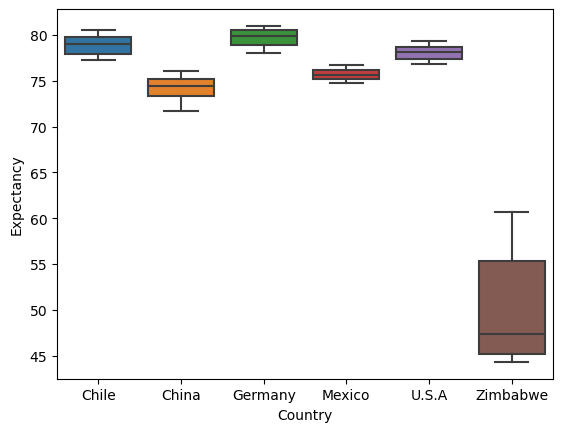

In [203]:
# lifexpect_dataset.draw_boxplot('Country', 'Expectancy')

ax = plt.subplot()
sns.boxplot(x='Country', y='Expectancy', data=lifexpect_dataset.data)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'U.S.A', 'Zimbabwe'])
plt.show()

#### Insights Derived: 
- Germany has the highest Life Expectancy, closely followed by Chile, while Zimbabwe has the least Life Expectancy

## Conclusion:

- An increase in Life Expectancy is observed over the years across all countries.
- An increase in GDP is also observed over the years across all countries.
- Chile, though having one of the least GDP, has one of the highest Life Expectancy.
- China has showed the highest magnitude of increase in GDP over the years, while Zimbabwe has shown the least.
- Zimbabwe has shown the highest magnitude of increase in Life Expectancy over the years while the U.S.A has shown the least.